In [2]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import statsmodels.api as sm

In [8]:
boston_rdatasets = sm.datasets.get_rdataset('Boston', 'MASS', True)

In [10]:
boston = boston_rdatasets.data

In [11]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [57]:
regr = sm.OLS(boston.medv, sm.add_constant(boston.lstat))

In [58]:
result = regr.fit()

In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           5.08e-88
Time:                        22:01:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
result.params

const    34.553841
lstat    -0.950049
dtype: float64

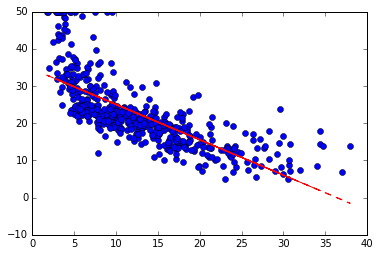

In [66]:
plt.plot(boston.lstat, boston.medv, 'o')
plt.plot(boston.lstat, result.fittedvalues, 'r--')

In [73]:
pred = result.predict(sm.add_constant(np.array([5, 10, 15])))

In [71]:
# Below gets the prediction intervals
# Currently there's no way to get the confidence intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [72]:
prstd, iv_l, iv_u = wls_prediction_std(result, 
                                       sm.add_constant(np.array([5, 10, 15])))

In [74]:
book_result = DataFrame({'fit': pred, 'lwr': iv_l, 'upr': iv_u})
book_result

,fit,lwr,upr
0,29.803594,17.565675,42.041513
1,25.053347,12.827626,37.279068
2,20.303101,8.077742,32.528459


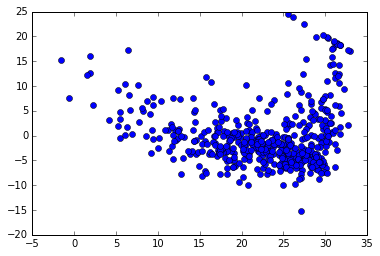

In [77]:
plt.plot(result.fittedvalues, result.resid, 'o')

In [81]:
model = sm.OLS(boston['medv'], sm.add_constant(boston[['lstat', 'age']]))
result = model.fit()

In [82]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           2.98e-88
Time:                        21:07:40   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000        31.787    34.659
lstat         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
age            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
boston.drop?

In [86]:
model = sm.OLS(boston['medv'], sm.add_constant(boston.drop('medv', axis=1)))
result = model.fit()

In [87]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 19 Sep 2016   Prob (F-statistic):          6.72e-135
Time:                        21:09:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000        26.432    46.487
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
zn             0.0464      0.014      3.382      0.001         0.019     0.073
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
chas           2.6867      0.862      3.118      0.002         0.994     4.380
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
rm             3.8099      0.418      9.116      0.000         2.989     4.631
age            0.0007      0.013      0.052      0.958        -0.025     0.027
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
rad            0.3060      0.066      4.613      0.000         0.176     0.436
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
black          0.0093      0.003      3.467      0.001         0.004     0.015
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model = sm.OLS(boston['medv'], 
               sm.add_constant(boston.drop(['medv', 'age'], axis=1)))
result = model.fit()

In [91]:
#Interaction term
boston['lstat * age'] = boston['lstat'] * boston['age']
model = sm.OLS(boston['medv'], 
               sm.add_constant(boston[['lstat', 'age', 'lstat * age']]))
result = model.fit()

In [92]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           4.86e-88
Time:                        21:14:04   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          36.0885      1.470     24.553      0.000        33.201    38.976
lstat          -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age            -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat * age     0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# Nonlinear transformations
boston['lstat^2'] = boston['lstat']**2
model = sm.OLS(boston['medv'], sm.add_constant(boston[['lstat', 'lstat^2']]))

In [97]:
result = model.fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 19 Sep 2016   Prob (F-statistic):          1.56e-112
Time:                        21:16:06   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000        41.149    44.575
lstat         -2.3328      0.124    -18.843      0.000        -2.576    -2.090
lstat^2        0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

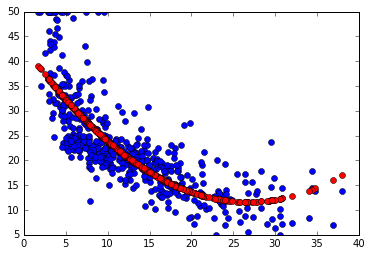

In [100]:
plt.plot(boston.lstat, boston.medv, 'o')
plt.plot(boston.lstat, result.fittedvalues, 'ro')

In [149]:
#attempt to use np.polyfit.  Seems right for deg=2
coeffs = np.polyfit(boston.lstat, boston.medv, 2)
coeffs

array([  0.04354689,  -2.3328211 ,  42.86200733])

In [160]:
#but maybe not correct for deg=5
coeffs = np.polyfit(boston.lstat, boston.medv, 5)
coeffs

array([ -1.63199416e-05,   1.72606825e-03,  -6.82738394e-02,
         1.27281826e+00,  -1.19911168e+01,   6.76996768e+01])

In [166]:
def fit_to_coeffs(x, coeffs):
    '''
    coeffs are expected to be the result of np.polyfit,
    so first coordinate is the highest degree.
    '''
    n = len(coeffs)
    degs = np.arange(n)[::-1]
    powers = np.power(x, degs)
    return np.sum(coeffs * powers)

In [163]:
boston.lstat.describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

In [167]:
test_vals = np.linspace(1.5, 38, 200)
fitted_vals = [fit_to_coeffs(x, coeffs) for x in test_vals]

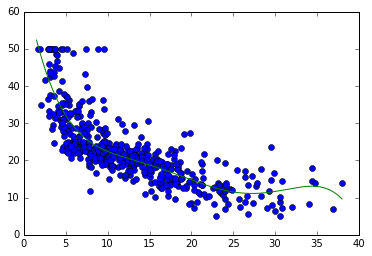

In [168]:
plt.plot(boston.lstat, boston.medv, 'o')
plt.plot(test_vals, fitted_vals, '-')

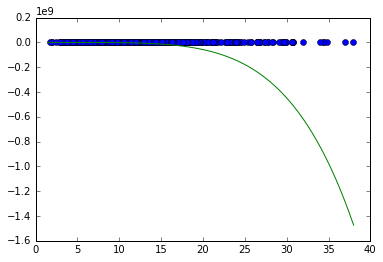

In [171]:
#Yeah... I think the book's coefficients are wrong.
book_coeffs = np.array([-19.252, 25.452, -27.051, 64.227, -152.460, 22.533])
book_fitted = [fit_to_coeffs(x, book_coeffs) for x in test_vals]
plt.plot(boston.lstat, boston.medv, 'o')
plt.plot(test_vals, book_fitted, '-')

In [180]:
carseats = pd.read_csv('../RDatasets/Carseats.csv', index_col=0)

In [202]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income:Advertising,Price:Age
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,803,5040
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,768,5395
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,350,4720
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,400,5335
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,192,4864


In [203]:
carseats['UrbanYes'] = carseats['Urban'].apply(lambda x: 1 if x == 'Yes' else 0)
carseats['USYes'] = carseats['US'].apply(lambda x: 1 if x == 'Yes' else 0)
carseats['ShelveLocGood'] = carseats['ShelveLoc'].apply(lambda x: 1 if x == 'Good' else 0)
carseats['ShelveLocMedium'] = carseats['ShelveLoc'].apply(lambda x: 1 if x == 'Medium' else 0)

In [204]:
carseats['Income:Advertising'] = carseats['Income'] * carseats['Advertising']
carseats['Price:Age'] = carseats['Price'] * carseats['Age']

In [206]:
carseats_ = carseats.drop(['ShelveLoc', 'Urban', 'US'], axis=1)

model = sm.OLS(carseats_['Sales'], sm.add_constant(carseats_.drop('Sales', axis=1)))
result = model.fit()

In [207]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 23 Sep 2016   Prob (F-statistic):          6.14e-166
Time:                        07:58:52   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                  6.5756      1.009      6.519      0.000         4.592     8.559
CompPrice              0.0929      0.004     22.567      0.000         0.085     0.101
Income                 0.0109      0.003      4.183      0.000         0.006     0.016
Advertising            0.0702      0.023      3.107      0.002         0.026     0.115
Population             0.0002      0.000      0.433      0.665        -0.001     0.001
Price                 -0.1008      0.007    -13.549      0.000        -0.115    -0.086
Age                   -0.0579      0.016     -3.633      0.000        -0.089    -0.027
Education             -0.0209      0.020     -1.063      0.288        -0.059     0.018
Income:Advertising     0.0008      0.000      2.698      0.007         0.000     0.001
Price:Age              0.0001      0.000      0.801      0.424        -0.000     0.000
UrbanYes               0.1402      0.112      1.247      0.213        -0.081     0.361
USYes                 -0.1576      0.149     -1.058      0.291        -0.450     0.135
ShelveLocGood          4.8487      0.153     31.724      0.000         4.548     5.149
ShelveLocMedium        1.9533      0.126     15.531      0.000         1.706     2.201
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""